In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_dir = '/content/drive/MyDrive/Data-Deep_Learning/dataset_jeruk/train'
test_dir = '/content/drive/MyDrive/Data-Deep_Learning/dataset_jeruk/validation'

train_data_masak = os.listdir(train_dir + '/Jeruk_Masak/')
train_data_mentah = os.listdir(train_dir + '/Jeruk_Mentah/')

In [3]:
# Augmentasi data training
train_datagen = ImageDataGenerator(
        rescale=1./255,  # normalisasi gambar
        rotation_range=20,  # rotasi gambar
        width_shift_range=0.2,  # pergeseran horizontal
        height_shift_range=0.2,  # pergeseran vertikal
        shear_range=0.2,  # shear transformation
        zoom_range=0.2,  # zoom gambar
        horizontal_flip=True,  # flipping horizontal
        fill_mode='nearest')  

# Normalisasi data testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data training dan testing
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data training
        target_size=(224, 224),  # ukuran gambar
        batch_size=32,  # ukuran batch
        class_mode='categorical')  # mode kelas

test_generator = test_datagen.flow_from_directory(
        test_dir,  # direktori data testing
        target_size=(224, 224),  # ukuran gambar
        batch_size=32,  # ukuran batch
        class_mode='categorical')  # mode kelas

Found 200 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [5]:
# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [7]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('vgg16_best.h5', monitor='accuracy', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs=20, 
    shuffle=True, 
    verbose=True,
    callbacks=callbacks_list)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.5200
Epoch 1: accuracy improved from -inf to 0.52000, saving model to vgg16_best.h5
7/7 [==============================] - 64s 6s/step - loss: 0.9988 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5000
Epoch 2: accuracy did not improve from 0.52000
7/7 [==============================] - 37s 5s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.4800
Epoch 3: accuracy did not improve from 0.52000
7/7 [==============================] - 38s 5s/step - loss: 0.6968 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.4949
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4500
Epoch 4: accuracy did not improve from 0.52000
7/7 [==========================

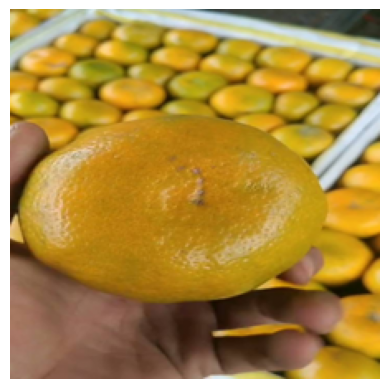

1/1 [==============================] - 1s 741ms/step
Masak


In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# Fungsi untuk memuat model VGG16
def load_vgg16_model(model_path):
    model = load_model(model_path)
    return model

# Fungsi untuk melakukan prediksi kelas gambar
def predict_image_class(model, image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Mengubah ukuran gambar menjadi 224x224 piksel (sesuai dengan VGG16)
    img_array = np.array(img)  # Mengonversi gambar menjadi array numpy
    plt.imshow(img_array/255.)
    plt.axis('off')
    plt.show()

    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch pada array gambar
    img_array = preprocess_input(img_array)  # Pra-pemrosesan gambar sesuai dengan persyaratan VGG16
    predictions = model.predict(img_array)  # Melakukan prediksi kelas gambar
    predicted_class = np.argmax(predictions, axis=1)[0]  # Mengambil indeks kelas dengan probabilitas tertinggi

    return predicted_class

# Memuat model VGG16
model_path = 'vgg16_best.h5'  # Ubah dengan path model VGG16 yang sudah dilatih
model = load_vgg16_model(model_path)

# Path gambar untuk pengujian
image_path = '/content/drive/MyDrive/Data-Deep_Learning/dataset_jeruk/test/jeruk_masak_1.jpg'

# Melakukan prediksi kelas gambar
predicted_class = predict_image_class(model, image_path)

# Menampilkan hasil prediksi
if predicted_class == 0:
    print("Masak")
else:
    print("Mentah")